In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('cereals.csv')


In [13]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100NaturalBran,Q,C,120,3.0,1.0,15,2.00,8,8,135,0.0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4.0,1.0,260,1.75,7,5,320,25.0,3,1.0,0.33,59.425505
2,All-BranwithExtraFiber,K,C,50,4.0,0.0,140,1.75,8,0,330,25.0,3,1.0,0.50,40.253086
3,AlmondDelight,R,C,110,2.0,2.0,200,1.00,14,8,?,25.0,3,1.0,0.75,34.384843
4,AppleCinnamonCheerios,G,C,110,2.0,2.0,180,1.50,10.5,10,70,25.0,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2.0,1.0,250,0.00,21,3,60,25.0,3,1.0,0.75,39.106174
72,Trix,G,C,110,1.0,1.0,140,0.00,13,12,25,25.0,2,1.0,1.00,27.753301
73,WheatChex,R,C,100,3.0,1.0,230,3.00,17,3,115,25.0,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3.0,1.0,200,3.00,17,3,110,25.0,1,1.0,1.00,51.592193


In [ ]:
# Create a table with the 5-number summary of all the numeric attributes. 

In [6]:
five_number_summary = df.describe(percentiles=[.25, .5, .75]).T[['min', '25%', '50%', '75%', 'max']]
five_number_summary.columns = ['Minimum', 'Q1', 'Median', 'Q3', 'Maximum']
print(five_number_summary)

            Minimum          Q1      Median          Q3     Maximum
calories  50.000000  100.000000  110.000000  110.000000  160.000000
protein    1.000000    2.000000    2.500000    3.000000    6.000000
fat        0.000000    0.000000    1.000000    2.000000    5.000000
sodium     0.000000  132.500000  180.000000  212.500000  320.000000
fiber      0.000000    0.750000    1.750000    3.000000   14.000000
vitamins   0.000000   25.000000   25.000000   25.000000  100.000000
shelf      1.000000    1.000000    2.000000    3.000000    3.000000
weight     0.500000    1.000000    1.000000    1.000000    1.500000
cups       0.250000    0.670000    0.750000    1.000000    1.500000
rating    18.042851   32.932466   40.253086   50.780847   93.704912


In [ ]:
#For each of the numeric attributes (proteins up to vitamins), identify and replace all missing data (indicated with -1) with the arithmetic mean of the attribute. 

In [9]:

df.replace(-1, pd.NA, inplace=True)
for column in df.select_dtypes(include='number').columns:
    df[column].fillna(df[column].mean(), inplace=True)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100NaturalBran,Q,C,120,3,5,15,2.0,8,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7,5,320,25,3,1.0,0.33,59.425505
2,All-BranwithExtraFiber,K,C,50,4,0,140,14.0,8,0,330,25,3,1.0,0.50,93.704912
3,AlmondDelight,R,C,110,2,2,200,1.0,14,8,?,25,3,1.0,0.75,34.384843
4,AppleCinnamonCheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13,12,25,25,2,1.0,1.00,27.753301
73,WheatChex,R,C,100,3,1,230,3.0,17,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17,3,110,25,1,1.0,1.00,51.592193


In [ ]:
#Create a table with the 5-number summary of all the numeric attributes after treating missing values.  Do you think the strategy used in dealing with missing values was effective? 

In [6]:
five_number_summary = df.describe(percentiles=[.25, .5, .75]).T[['min', '25%', '50%', '75%', 'max']]
five_number_summary.columns = ['Minimum', 'Q1', 'Median', 'Q3', 'Maximum']
print(five_number_summary)

            Minimum          Q1      Median          Q3     Maximum
calories  50.000000  100.000000  110.000000  110.000000  160.000000
protein    1.000000    2.000000    2.500000    3.000000    6.000000
fat        0.000000    0.000000    1.000000    2.000000    5.000000
sodium     0.000000  132.500000  180.000000  212.500000  320.000000
fiber      0.000000    0.750000    1.750000    3.000000   14.000000
vitamins   0.000000   25.000000   25.000000   25.000000  100.000000
shelf      1.000000    1.000000    2.000000    3.000000    3.000000
weight     0.500000    1.000000    1.000000    1.000000    1.500000
cups       0.250000    0.670000    0.750000    1.000000    1.500000
rating    18.042851   32.932466   40.253086   50.780847   93.704912


In [ ]:
#For each of the numeric attributes (proteins up to vitamins), identify and replace all noisy data with the median of attribute. 

In [14]:
def replace_outliers_with_median(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        median = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column].median()
        
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    
    return df

df_cleaned = replace_outliers_with_median(df)

print(df_cleaned)


                      name mfr type  calories  protein  fat  sodium  fiber  \
0           100NaturalBran   Q    C     120.0      3.0  5.0   190.0    2.0   
1                 All-Bran   K    C     110.0      4.0  1.0   260.0    1.5   
2   All-BranwithExtraFiber   K    C     110.0      4.0  0.0   140.0    1.5   
3            AlmondDelight   R    C     110.0      2.0  2.0   200.0    1.0   
4    AppleCinnamonCheerios   G    C     110.0      2.0  2.0   180.0    1.5   
..                     ...  ..  ...       ...      ...  ...     ...    ...   
71                 Triples   G    C     110.0      2.0  1.0   250.0    0.0   
72                    Trix   G    C     110.0      1.0  1.0   140.0    0.0   
73               WheatChex   R    C     100.0      3.0  1.0   230.0    3.0   
74                Wheaties   G    C     100.0      3.0  1.0   200.0    3.0   
75       WheatiesHoneyGold   G    C     110.0      2.0  1.0   200.0    1.0   

   carbo sugars potass  vitamins  shelf  weight  cups     ratin

In [ ]:
#Create a table with the 5-number summary of all the numeric attributes after treating noisy values.  Do you think the strategy used in dealing with noisy values was effective? 

In [15]:
def compute_five_number_summary(df):
    summary = pd.DataFrame(columns=['Minimum', 'Q1', 'Median', 'Q3', 'Maximum'])
    
    for column in df.select_dtypes(include=[np.number]).columns:
        minimum = df[column].min()
        Q1 = df[column].quantile(0.25)
        median = df[column].median()
        Q3 = df[column].quantile(0.75)
        maximum = df[column].max()
        
        summary.loc[column] = [minimum, Q1, median, Q3, maximum]
    
    return summary

five_number_summary = compute_five_number_summary(df_cleaned)

print("5-Number Summary after treating noisy values:")
print(five_number_summary)

print("\nCleaned DataFrame:")
print(df_cleaned)

5-Number Summary after treating noisy values:
            Minimum          Q1      Median          Q3     Maximum
calories  90.000000  100.000000  110.000000  110.000000  120.000000
protein    1.000000    2.000000    2.000000    3.000000    4.000000
fat        0.000000    0.000000    1.000000    2.000000    5.000000
sodium    70.000000  157.500000  190.000000  210.000000  290.000000
fiber      0.000000    0.750000    1.500000    3.000000    6.000000
vitamins  25.000000   25.000000   25.000000   25.000000   25.000000
shelf      1.000000    1.000000    2.000000    3.000000    3.000000
weight     1.000000    1.000000    1.000000    1.000000    1.000000
cups       0.250000    0.670000    0.750000    1.000000    1.330000
rating    18.042851   32.932466   40.105965   50.031833   74.472949

Cleaned DataFrame:
                      name mfr type  calories  protein  fat  sodium  fiber  \
0           100NaturalBran   Q    C     120.0      3.0  5.0   190.0    2.0   
1                 All-Bran   K

In [9]:
crosstab = pd.crosstab(df['type'], df['mfr'])
print(crosstab)


mfr   A   G   K  N  P  Q  R
type                       
C     0  22  23  4  9  7  8
H     1   0   0  1  0  1  0


In [12]:
print("best rating is",df[df.rating==df.rating.max()].name)
print("worst rating is",df[df.rating==df.rating.min()].name)

best rating is 63    ShreddedWheatnBran
Name: name, dtype: object
worst rating is 9    CapnCrunch
Name: name, dtype: object


<AxesSubplot:xlabel='rating', ylabel='type'>

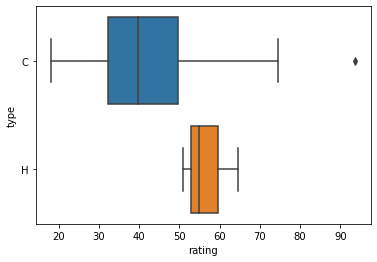

In [16]:
sns.boxplot(x="rating",y="type",data=df)

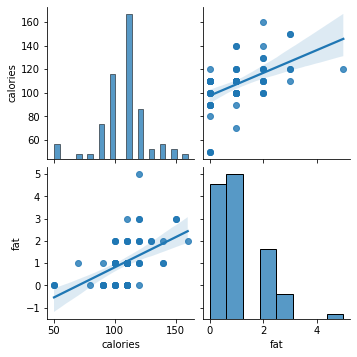

In [17]:
sns.pairplot(df[["sugars","calories","carbo","fat"]],kind="reg")

In [18]:
correlation_matrix = df[["sugars","calories","carbo","fat"]].corr()

print(correlation_matrix)

          calories      fat
calories   1.00000  0.51063
fat        0.51063  1.00000


In [24]:
highest_calories = df.groupby('mfr')['calories'].max().reset_index()
highest_calories_sorted = highest_calories.sort_values(by='calories', ascending=False)
top_cereal = highest_calories_sorted.iloc[0]
print(top_cereal)

mfr           K
calories    160
Name: 2, dtype: object


In [28]:
correlation = df['calories'].corr(df['rating'])
print(correlation)


-0.6743360496799723


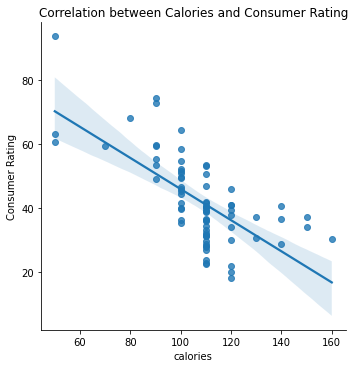

In [31]:
sns.lmplot(x='calories', y='rating', data=df)
plt.title('Correlation between Calories and Consumer Rating')
plt.xlabel('calories')
plt.ylabel('Consumer Rating')
plt.show()

In [32]:
correlation = df['shelf'].corr(df['rating'])
print(correlation)

0.0019730207509652386


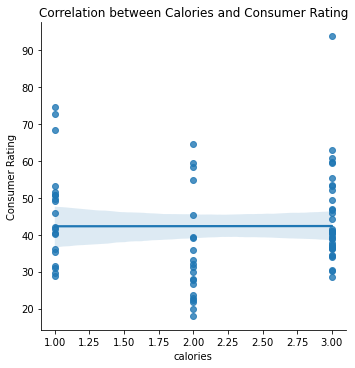

In [33]:
sns.lmplot(x='shelf', y='rating', data=df)
plt.title('Correlation between Calories and Consumer Rating')
plt.xlabel('calories')
plt.ylabel('Consumer Rating')
plt.show()

In [34]:
best = df.loc[df['rating'].idxmax()]
print(best)

name        All-BranwithExtraFiber
mfr                              K
type                             C
calories                        50
protein                          4
fat                              0
sodium                         140
fiber                         14.0
carbo                            8
sugars                           0
potass                         330
vitamins                        25
shelf                            3
weight                         1.0
cups                           0.5
rating                   93.704912
Name: 2, dtype: object


In [36]:
correlation_matrix = df.corr()
top_nutrients = correlation_matrix['rating'].abs().sort_values(ascending=False).index[1:4]
print(f'Top 3 nutrients: {top_nutrients}')
X = df[top_nutrients]
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_table = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R^2 Score'],
    'Value': [mse, r2]
})
print(accuracy_table)

Top 3 nutrients: Index(['calories', 'fiber', 'protein'], dtype='object')
               Metric      Value
0  Mean Squared Error  51.196966
1           R^2 Score   0.525028


In [16]:
#exercise2


In [18]:
import pandas as pd

df = pd.read_csv('bengaluru_house_prices.csv')


In [19]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
#Compute the total number of missing values in the DataFrame.

In [20]:
total_missing_values = df.isna().sum().sum()
print(f"Total number of missing values: {total_missing_values}")

Total number of missing values: 6201


In [ ]:
#Compute the percentage of missing values in the DataFrame. If a column has more than 15% missing values then drop (or remove) the column from the DataFrame.

In [21]:

missing_percentage = df.isna().mean() * 100


columns_to_drop = missing_percentage[missing_percentage > 15].index
df.drop(columns=columns_to_drop, inplace=True)

print(f"Columns dropped due to missing values: {columns_to_drop.tolist()}")


Columns dropped due to missing values: ['society']


In [ ]:
#Which column has the most number of missing values?

In [22]:

column_most_missing = df.isna().sum().idxmax()
print(f"Column with the most number of missing values: {column_most_missing}")


Column with the most number of missing values: balcony


In [ ]:
#drop (or remove) the rows containing the missing values in the location, size, and total_sqft columns 

In [24]:

df.dropna(subset=['location', 'size', 'total_sqft'], inplace=True)


In [25]:
df


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [ ]:
#drop all the rows in the bath column containing more than 5 bathrooms.

In [16]:

df['bath'] = pd.to_numeric(df['bath'], errors='coerce')

df = df[df['bath'] <= 5]


KeyError: 'bath'

In [ ]:
#Find the houses available in each area. 

In [27]:

houses_per_area = df['location'].value_counts()
print(houses_per_area)


Whitefield                        530
Sarjapur  Road                    384
Electronic City                   301
Kanakpura Road                    262
Thanisandra                       230
                                 ... 
Okalipura                           1
Vasantapura main road               1
1st Stage Radha Krishna Layout      1
Dwarka Nagar                        1
Abshot Layout                       1
Name: location, Length: 1260, dtype: int64


In [ ]:
#Find the top five areas where the large number of houses available

In [28]:

top_five_areas = houses_per_area.head(5)
print("Top five areas with the largest number of houses:")
print(top_five_areas)


Top five areas with the largest number of houses:
Whitefield         530
Sarjapur  Road     384
Electronic City    301
Kanakpura Road     262
Thanisandra        230
Name: location, dtype: int64


In [ ]:
#Visualize the house price based on build up area of top five locations where the large number of houses available (Visualize by independent charts.)

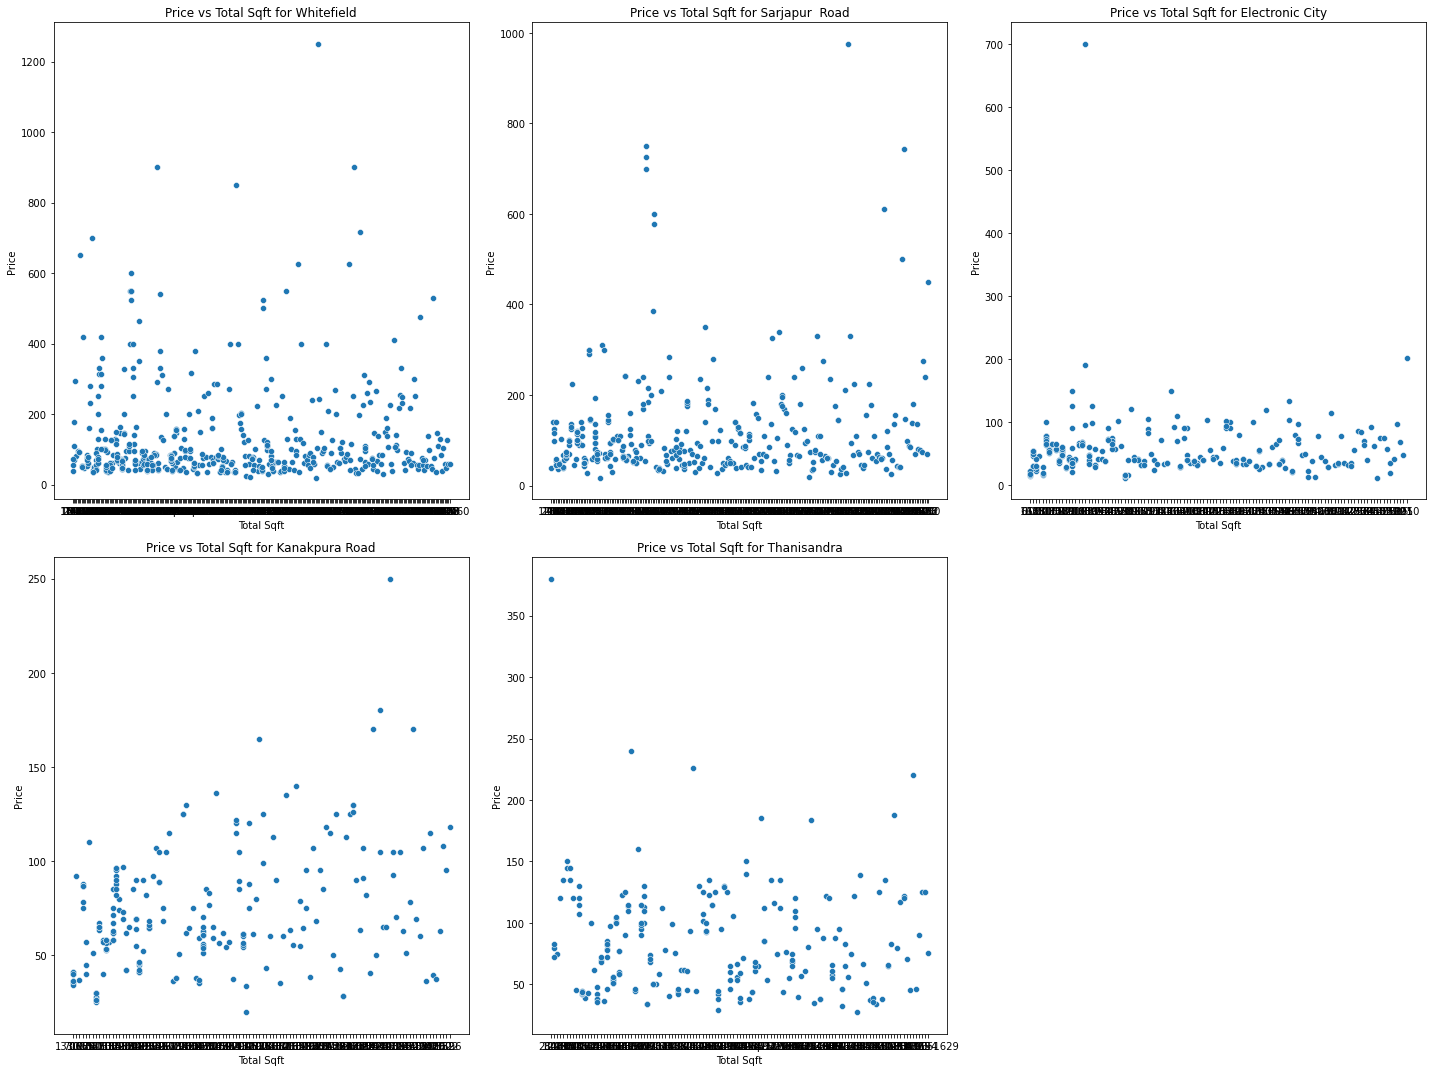

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

top_five_areas_df = df[df['location'].isin(top_five_areas.index)]

plt.figure(figsize=(20, 15))
for i, area in enumerate(top_five_areas.index, 1):
    plt.subplot(2, 3, i)
    area_df = top_five_areas_df[top_five_areas_df['location'] == area]
    sns.scatterplot(data=area_df, x='total_sqft', y='price')
    plt.title(f'Price vs Total Sqft for {area}')
    plt.xlabel('Total Sqft')
    plt.ylabel('Price')

plt.tight_layout()
plt.show()
